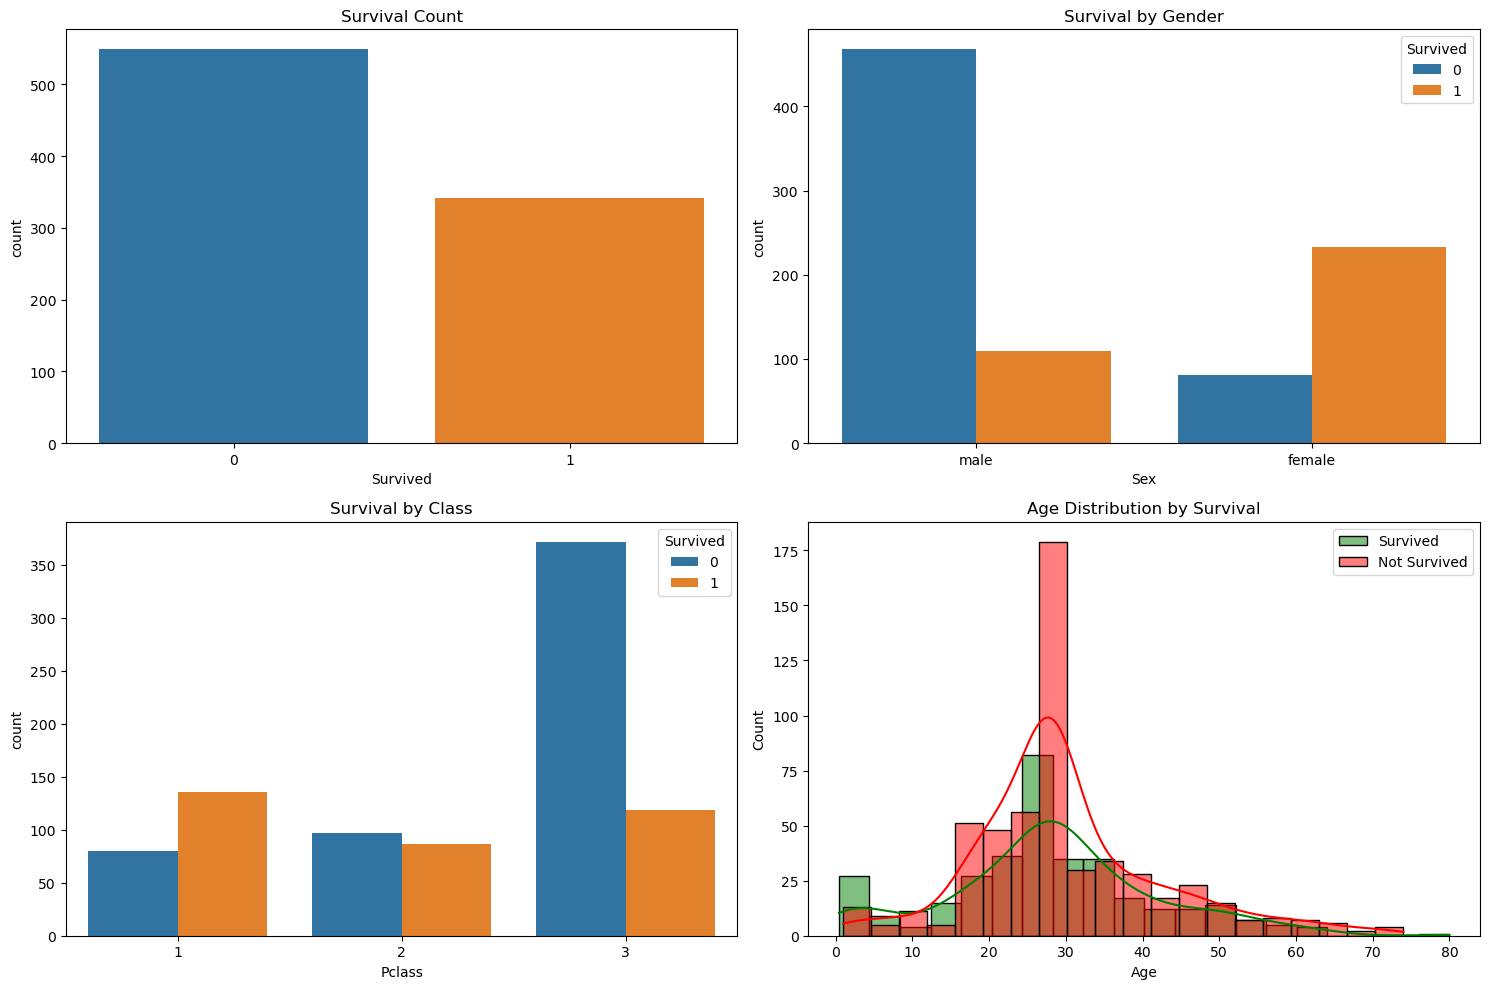


Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Correlations:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load only the training dataset (contains Survived)
df = pd.read_csv('train.csv')

# Data Cleaning
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Visualization
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

plt.subplot(2,2,2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')

plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')

plt.subplot(2,2,4)
sns.histplot(df[df['Survived']==1]['Age'], bins=20, label='Survived', color='g', kde=True)
sns.histplot(df[df['Survived']==0]['Age'], bins=20, label='Not Survived', color='r', kde=True)
plt.legend()
plt.title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

# Summary
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nSurvival Rate by Gender:\n", df.groupby('Sex')['Survived'].mean())
print("\nSurvival Rate by Class:\n", df.groupby('Pclass')['Survived'].mean())
print("\nCorrelations:\n", df.corr())

# Save cleaned data
df.to_csv('titanic_cleaned.csv', index=False)
print("\nCleaned dataset saved as titanic_cleaned.csv")
